# Dublin Parish Map Boundaries

Data from http://census.cso.ie/censusasp/saps/boundaries/Census2011_Dublin_Parishes_generalised.zip

In [5]:
%matplotlib inline

In [1]:
import geopandas

Previously we used this ogr2ogr command to convert the Shapefile into a GeoJSON file:
```
ogr2ogr -f GeoJSON -t_srs crs:84 ./data/dublin_parishes.geojson ./original_data/Census2011_Dublin_Parishes_generalised.shp
```

We do not distribute the original Shapefile in this repo but it is available at the [CSO website](http://census.cso.ie/censusasp/saps/boundaries/Census2011_Dublin_Parishes_generalised.zip).

Let's read the GeoJSON file

In [7]:
parishes = geopandas.read_file("./data/dublin_parishes.geojson")

We can see all the columns that are available:

In [10]:
parishes.head()

,CREATEDATE,Deanery,Female2011,GEOG_ID,HS2011,Male2011,PARISH_ID,PCVac2011,PPOcc2011,Par_Name,Total2011,Unocc2011,Vacant2011,geometry
0,30-10-2013,Bray,5139.0,H10018,4137.0,4899.0,10018,9.5,3607.0,Cabinteely,10038.0,530.0,393.0,POLYGON ((-6.148265634861978 53.26563679631947...
1,30-10-2013,Bray,4700.0,H10014,3475.0,4254.0,10014,4.8,3199.0,Ballybrack - Killiney,8954.0,276.0,167.0,POLYGON ((-6.111792439933751 53.27023935020244...
2,30-10-2013,Bray,1894.0,H10025,1234.0,1771.0,10025,1.9,1196.0,Loughlinstown,3665.0,38.0,23.0,POLYGON ((-6.124858107130685 53.25128086802361...
3,30-10-2013,Bray,11495.0,H10026,9110.0,10793.0,10026,10.3,7907.0,Sandyford,22288.0,1203.0,938.0,POLYGON ((-6.200467319290477 53.27864839840855...
4,30-10-2013,Bray,5235.0,H10027,3859.0,4867.0,10027,5.2,3560.0,Shankill,10102.0,299.0,199.0,POLYGON ((-6.112127995483513 53.24294187633203...


And plot the shapes without an underlying map:

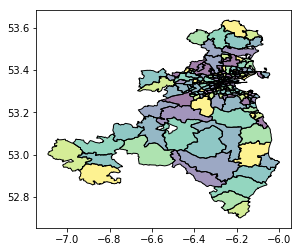

In [9]:
parishes.plot()

If we render the GeoJSON file on Github all the extra columns will also be displayed.

In [37]:
IFrame(src='https://render.githubusercontent.com/view/geojson?url=https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/dublin_parishes.geojson', width=1000, height=600)

Instead we can trim down to the columns we really want, e.g. the parish name and geometry:

In [11]:
cleaned_parishes = parishes[["Par_Name", "geometry"]]
cleaned_parishes.columns = ["Parish Name", "geometry"]

In [12]:
cleaned_parishes.head()

,Parish Name,geometry
0,Cabinteely,POLYGON ((-6.148265634861978 53.26563679631947...
1,Ballybrack - Killiney,POLYGON ((-6.111792439933751 53.27023935020244...
2,Loughlinstown,POLYGON ((-6.124858107130685 53.25128086802361...
3,Sandyford,POLYGON ((-6.200467319290477 53.27864839840855...
4,Shankill,POLYGON ((-6.112127995483513 53.24294187633203...


In [19]:
new_geojson = cleaned_parishes.to_json()

In [22]:
with open("./data/cleaned_dublin_parishes.geojson", "w") as f:
    f.write(new_geojson)

We can now push the new GeoJSON file to Github and view it:

In [31]:
from IPython.display import HTML, Javascript, IFrame

In [36]:
IFrame(src='https://render.githubusercontent.com/view/geojson?url=https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson', width=1000, height=600)